# Trade Generator

In [1]:
import pandas as pd
import numpy as np
from portfolio_optimization.portfolio.trade_generator import *

980.0


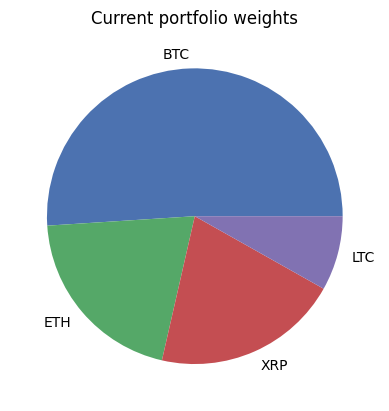

In [2]:
# Current portfolio
portfolio = pd.Series([0.05, 0.2, 400, 0.8], index=['BTC', 'ETH', 'XRP', 'LTC'])

prices = pd.Series([10000, 1000, 0.5, 100], index=['BTC', 'ETH', 'XRP', 'LTC'])

# Plot weights of the portfolio, based on the current prices
weights = portfolio * prices
weights.plot(kind='pie', title='Current portfolio weights')

print(weights.sum())

# Rebalance Simulation

In [3]:
new_target_weights = pd.Series([0.45, 0.25, 0.25, 0.05], index=['BTC', 'ETH', 'XRP', 'LTC'])

# Weight Assets is a list of tuple such that (min, ideal, max). For now, min and max are ± 10% of ideal
weight_assets = [(
    new_target_weights[i], # - 0.1 * new_target_weights[i],
    new_target_weights[i],
    new_target_weights[i], # + 0.1 * new_target_weights[i]
) for i in new_target_weights.index]

# Order size Assets is a list of tuple such that (minOrderSize, maxOrderSize). For now, min and max are [0, 10000]
order_size_assets = [(50, 1000) for i in new_target_weights.index]

tbd = 0
orders = totalOrders(
    np.array(portfolio),
    np.array(prices),
    np.array(order_size_assets),
    np.array(weight_assets),
    tbd
)

sizes = orderSize(
    np.array(portfolio),
    np.array(prices),
    np.array(order_size_assets),
    np.array(weight_assets),
    tbd
)

buySell = buyINDAsset(
    np.array(portfolio),
    np.array(prices),
    np.array(order_size_assets),
    np.array(weight_assets),
    tbd
)

trades = orders * sizes

trades

array([-59.,   0.,   0.,  -0.])

921.0


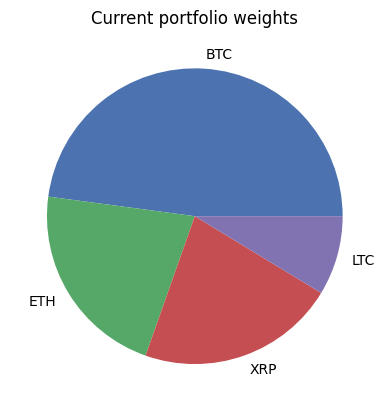

In [4]:
# Execute the trades

_portfolio = portfolio + trades / prices

value = _portfolio * prices
value.plot(kind='pie', title='Current portfolio weights')

print(value.sum())

# Bug
As seen above, without changing the price, the rebalance simulation lost money, which should not happen. Here is a traceback of all the parameters used for the computation.

In [5]:
# Traceback
df = pd.DataFrame()

df['minMaxCurrentDifAsset'] = minMaxCurrentDifAsset(np.array(portfolio), np.array(prices), np.array(weight_assets), tbd)
df['rebalanceDelta'] = rebalanceDeltaAsset(np.array(portfolio), np.array(prices), np.array(weight_assets), tbd)
df['rebalanceDeltaTotal'] = rebalanceDeltaTotalAsset(np.array(portfolio), np.array(prices), np.array(weight_assets), tbd)
df['rebalanceMinSizeDelta'] = rebalanceMinSizeDeltaAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['rebalanceMinSizeDeltaTotal'] = rebalanceMinSizeDeltaTotalAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['buyINDAsset'] = buyINDAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['totalBuyOrder'] = totalbuyOrderAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['totalSellOrder'] = totalsellOrderAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['maxToMinRank'] = maxToMinRankAsset(np.array(portfolio), np.array(prices), np.array(weight_assets), tbd)
df['minToMaxRank'] = minToMaxRankAsset(np.array(portfolio), np.array(prices), np.array(weight_assets), tbd)
df['assetCapRank'] = assetCapRankAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['assetRawCapFilled'] = rawCapFilledAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['assetCapToFill'] = capToFillAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['minOrder'] = minOrderAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['additionalOrder'] = additionalOrdersAsset(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['totalOrders'] = totalOrders(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)
df['orderSizes'] = orderSize(np.array(portfolio), np.array(prices), np.array(order_size_assets), np.array(weight_assets), tbd)


df.index = portfolio.index

df

,minMaxCurrentDifAsset,rebalanceDelta,rebalanceDeltaTotal,rebalanceMinSizeDelta,rebalanceMinSizeDeltaTotal,buyINDAsset,totalBuyOrder,totalSellOrder,maxToMinRank,minToMaxRank,assetCapRank,assetRawCapFilled,assetCapToFill,minOrder,additionalOrder,totalOrders,orderSizes
BTC,-59.0,-59.0,-90.0,0.0,-31.0,0.0,2.0,2.0,2,0,0,0.0,-59.0,1.0,0.0,1.0,-59.0
ETH,45.0,0.0,-90.0,0.0,-31.0,1.0,2.0,2.0,1,3,3,-90.0,45.0,0.0,0.0,0.0,0.0
XRP,45.0,0.0,-90.0,0.0,-31.0,1.0,2.0,2.0,3,1,5,-45.0,14.0,0.0,0.0,0.0,0.0
LTC,-31.0,-31.0,-90.0,-31.0,-31.0,0.0,2.0,2.0,0,2,2,-59.0,-31.0,0.0,0.0,0.0,-0.0


[-0.00250982 -0.00251165  0.00751854 -0.00249527]
optimal
BTC    386.030565
ETH    290.026925
XRP    309.886704
LTC     14.059369
dtype: float64
1000.0035618600272
1980.0035618600273


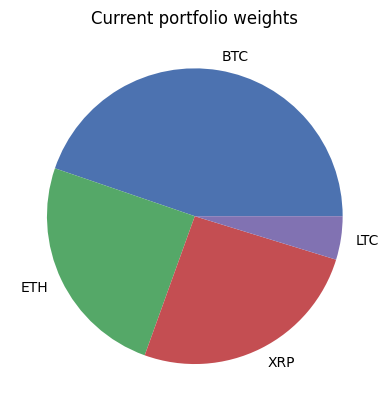

In [6]:
from portfolio_optimization.portfolio.rebalancing import *

opt = optimize_trades(
    holdings=portfolio,
    new_target_weights=new_target_weights,
    prices=prices,
    min_W=0.01,
    max_W=0.5,
    external_movement=1000,
)

print(opt * prices)
print((opt * prices).sum())

# Execute the trades

portfolio = portfolio + opt

value = portfolio * prices
value.plot(kind='pie', title='Current portfolio weights')
print(value.sum())